# Assignment SNA

## Part I

### Question 1

In [1]:
import numpy as np
import pandas as pd
import math
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerLine2D
import sys



In [2]:
#Read the dataset
df=pd.read_csv("sx-stackoverflow.txt", sep = ' ', header=None)
df.columns = ['Node A', 'Node B', 'Timestamp']
minTimestamp=df.head(1)['Timestamp']
maxTimestamp=df.tail(1)['Timestamp']
#N Time periods
N=91
timeDiff=(int(maxTimestamp)-int(minTimestamp))/N


In [3]:
#
timeperiods=[float(minTimestamp)]
a=float(minTimestamp)
for i in range(0,N):
    a=a+float(timeDiff)
    print(a)
    timeperiods.append(a)

1220202003.9340658
1222836130.8681316
1225470257.8021975
1228104384.7362633
1230738511.670329
1233372638.604395
1236006765.5384607
1238640892.4725266
1241275019.4065924
1243909146.3406582
1246543273.274724
1249177400.2087898
1251811527.1428556
1254445654.0769215
1257079781.0109873
1259713907.945053
1262348034.879119
1264982161.8131847
1267616288.7472506
1270250415.6813164
1272884542.6153822
1275518669.549448
1278152796.4835138
1280786923.4175797
1283421050.3516455
1286055177.2857113
1288689304.219777
1291323431.153843
1293957558.0879087
1296591685.0219746
1299225811.9560404
1301859938.8901062
1304494065.824172
1307128192.7582378
1309762319.6923037
1312396446.6263695
1315030573.5604353
1317664700.494501
1320298827.428567
1322932954.3626328
1325567081.2966986
1328201208.2307644
1330835335.1648302
1333469462.098896
1336103589.0329618
1338737715.9670277
1341371842.9010935
1344005969.8351593
1346640096.7692251
1349274223.703291
1351908350.6373568
1354542477.5714226
1357176604.5054884
135981

In [4]:
#ETC: 4 mins to split the dataset.
#dfs = {'df' + str(i):df for i in range(1,N):indices=df[df['Timestamp']<= int(minTimestamp+timeDiff)].index.tolist()}
#print (dfs)
dfs={}
stepafter=minTimestamp
stepbefore=minTimestamp
for i in range(0,N):
    stepbefore=float(stepafter)
    stepafter=float(stepafter)+float(timeDiff)
    indices=df[(df['Timestamp']>=float(stepbefore)) & (df['Timestamp']< math.ceil(float(stepafter)))].index.tolist()
    dfs.update({'df' + str(i):df.iloc[indices]})
    dfs.update({'df'+ str(i) : dfs['df'+str(i)].sort_values(by=['Timestamp'], ascending=True, axis=0)})
dfs
#dfs['df1'].to_csv('out1.csv', sep=' ')
#G1=nx.from_pandas_edgelist(dfs['df0'], 'Node A', 'Node B', 'Timestamp')
#G1[9][8]['Timestamp']

{'df0':        Node A  Node B   Timestamp
 0           9       8  1217567877
 1           1       1  1217573801
 2          13       1  1217606247
 3          17       1  1217617639
 4          48       2  1217618182
 5          17       1  1217618239
 6          19       9  1217618357
 7          13      23  1217618560
 8          13      11  1217618799
 9          23      23  1217619360
 10         35      33  1217620542
 11         39      33  1217620597
 12         43      22  1217620971
 13         17      32  1217621272
 14         39      40  1217621416
 15         37      40  1217621670
 16         45      45  1217621917
 17         17      17  1217622124
 18         49      13  1217623079
 19         13      23  1217623216
 20         50      37  1217623475
 21         40      37  1217623560
 22         55       8  1217623986
 23         51      32  1217624788
 24         60       2  1217625055
 25         39       8  1217625808
 26         59      59  1217625982
 27         6

### Question 2

In [89]:
#Creation of subgraphs using NetworkX. ETC:1 hour. It is mentioned that for the rest 91-70 
#we get memory error-we don't have enough RAM. We tried with N=300,600,2500,3000. 
#Thus, the analysis following will take into consideration the data till the 1401956755 timestamp.
graphs={}
for i in range(0,70):
    print(i)
    graphs.update({'G' + str(i): nx.from_pandas_edgelist(dfs['df'+str(i)],'Node A', 'Node B', 'Timestamp')})
    #graphs.update({'G'+ str(i) : nx.from_pandas_edgelist(dfs['df'+str(i)],'Node A', 'Node B', 'Timestamp')})



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69


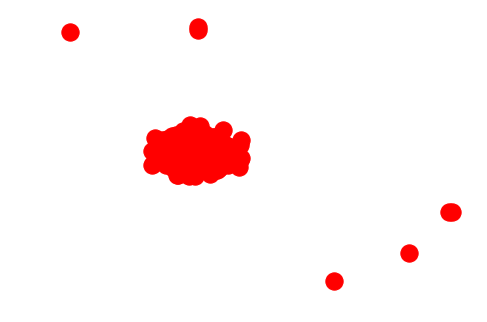

In [17]:
nx.draw(graphs['G0'])

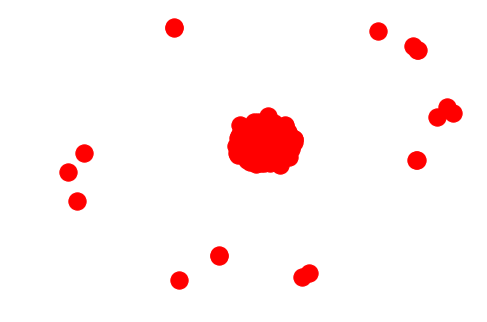

In [18]:
nx.draw(graphs['G1'])

### Question 3

In [6]:
#Volumes of edges
edgelist=[]
for key, value in graphs.items():
    a=value.number_of_edges()
    print(a)
    edgelist.append(a)

13722
67183
65119
50209
48603
67136
78005
78715
80870
95121
108280
112708
111846
115620
129723
151558
143681
163849
171711
172461
163259
175425
185694
195158
209502
199118
204500
234472
218376
264279
299443
310130
316114
323227
316294
330997
341245
318223
327632
355573
323666
386605
415103
417592
427470
410284
431246
450313
431024
441160
477671
462318
439278
517448
526749
569909
550613
519831
547066
547536
544179
562038
567355
586574
534950
606690
665397
656238
579151
563863


In [7]:
#Volumes of Vertices
verticelist=[]
for key, value in graphs.items():
    a=value.number_of_nodes()
    print(a)
    verticelist.append(a)



2136
9505
9725
9653
9693
11442
13125
14126
15092
17820
19782
21173
22259
23333
28243
33600
32949
36152
39045
41133
41493
45033
47309
49114
52895
51384
53920
60691
59650
69851
79954
82686
84995
87333
87036
92448
96133
93670
96456
102758
97833
113592
123045
124836
129877
127606
133108
139456
137615
143179
155248
154071
146347
168023
173980
185225
185154
177779
184785
185111
185179
195779
199186
206448
190792
213037
228759
230304
211568
212102


Text(0.5,1,'Time Evolution of Vertices and Edges')

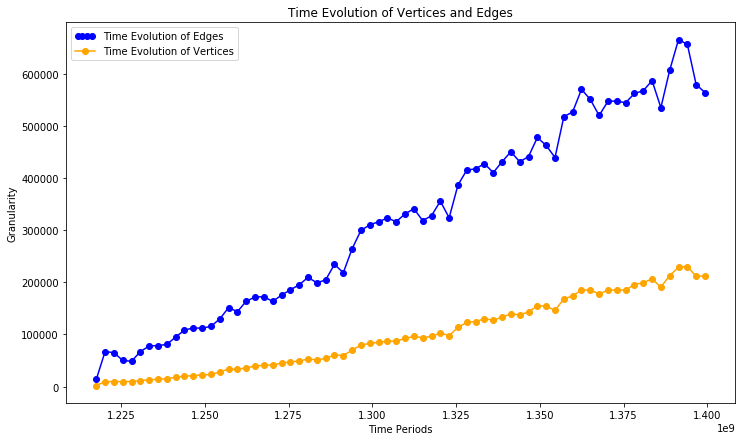

In [8]:
#The Graph
fig=plt.figure(figsize=(12,7))
line1,=plt.plot(timeperiods[0:70], edgelist,color='blue',marker='o',label='Time Evolution of Edges')
line2,=plt.plot(timeperiods[0:70], verticelist, color='orange',marker='o',label='Time Evolution of Vertices')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
plt.xlabel('Time Periods')
plt.ylabel('Granularity')
plt.title('Time Evolution of Vertices and Edges')

### Question 4

#### a) Degree Centrality 

In [9]:
#Computation for the 1st subgraph
nx.degree_centrality(graphs['G0'])

{9: 0.011241217798594848,
 8: 0.00234192037470726,
 1: 0.04028103044496487,
 13: 0.01686182669789227,
 17: 0.03840749414519906,
 48: 0.00702576112412178,
 2: 0.005152224824355972,
 19: 0.000468384074941452,
 23: 0.002810304449648712,
 11: 0.000936768149882904,
 35: 0.039344262295081964,
 33: 0.01826697892271663,
 39: 0.013114754098360656,
 43: 0.000468384074941452,
 22: 0.007962529274004683,
 32: 0.003747072599531616,
 40: 0.029508196721311476,
 37: 0.007494145199063232,
 45: 0.006088992974238876,
 49: 0.024355971896955503,
 50: 0.009836065573770491,
 55: 0.014988290398126464,
 51: 0.03700234192037471,
 60: 0.017330210772833723,
 59: 0.013114754098360656,
 61: 0.02763466042154567,
 58: 0.024824355971896955,
 25: 0.03185011709601873,
 2089740: 0.01405152224824356,
 72: 0.02810304449648712,
 36: 0.004215456674473068,
 146270: 0.00468384074941452,
 34: 0.01826697892271663,
 26: 0.03138173302107728,
 78: 0.003278688524590164,
 71: 0.035597189695550355,
 42: 0.015925058548009366,
 86: 0.016

Text(0.5,1,'Probability Density Function of the Degree Centralities of nodes for the the first graph G0')

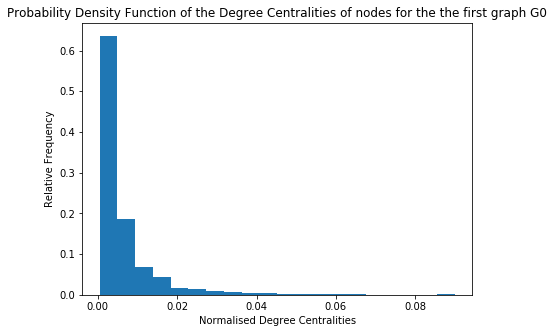

In [10]:
#Graphical Representation for the 1st subgraph
mydata=np.array(list(nx.degree_centrality(graphs['G0']).values()))
fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(111)
n, bins, patches=ax.hist(mydata, bins=20, weights=np.zeros_like(mydata)+ 1./ mydata.size)
ax.set_xlabel('Normalised Degree Centralities', size=10)
ax.set_ylabel('Relative Frequency', size=10)
ax.legend
ax.set_title('Probability Density Function of the Degree Centralities of nodes for the the first graph G0')

Text(0.5,1,'Probability Density Function of the Degree Centralities of nodes for the the first graph G69')

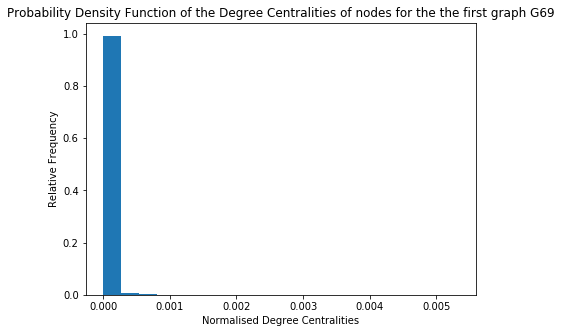

In [11]:
#Computation for the last subgraph and representation
mydata=np.array(list(nx.degree_centrality(graphs['G69']).values()))
fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(111)
n, bins, patches=ax.hist(mydata, bins=20, weights=np.zeros_like(mydata)+ 1./ mydata.size)
ax.set_xlabel('Normalised Degree Centralities', size=10)
ax.set_ylabel('Relative Frequency', size=10)
ax.legend
ax.set_title('Probability Density Function of the Degree Centralities of nodes for the the first graph G69')

#### b) Closeness Centrality 

Text(0.5,1,'Probability Density Function of the Closeness Centralities of nodes for the the first graph G0')

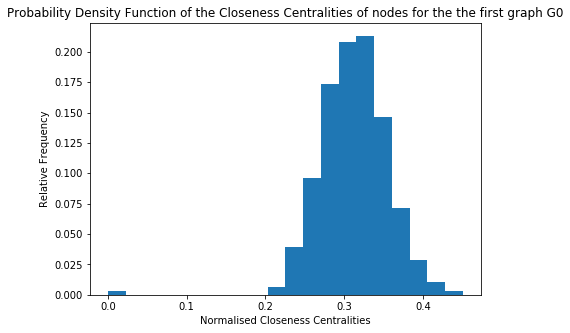

In [135]:
mydata=np.array(list(nx.closeness_centrality(graphs['G0']).values()))
fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(111)
n, bins, patches=ax.hist(mydata, bins=20, weights=np.zeros_like(mydata)+ 1./ mydata.size)
ax.set_xlabel('Normalised Closeness Centralities', size=10)
ax.set_ylabel('Relative Frequency', size=10)
ax.legend
ax.set_title('Probability Density Function of the Closeness Centralities of nodes for the the first graph G0')

#### c) Betweenness Centrality

Text(0.5,1,'Probability Density Function of the Betweenness Centralities of nodes for the the first graph G0')

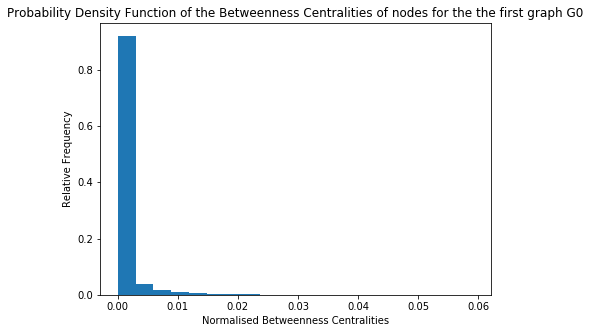

In [89]:
mydata=np.array(list(nx.betweenness_centrality(graphs['G0']).values()))
fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(111)
n, bins, patches=ax.hist(mydata, bins=20, weights=np.zeros_like(mydata)+ 1./ mydata.size)
ax.set_xlabel('Normalised Betweenness Centralities', size=10)
ax.set_ylabel('Relative Frequency', size=10)
ax.legend
ax.set_title('Probability Density Function of the Betweenness Centralities of nodes for the the first graph G0')

#### d) Eigen Vector Centrality

Text(0.5,1,'Probability Density Function of the Eigenvector Centralities of nodes for the the first graph G0')

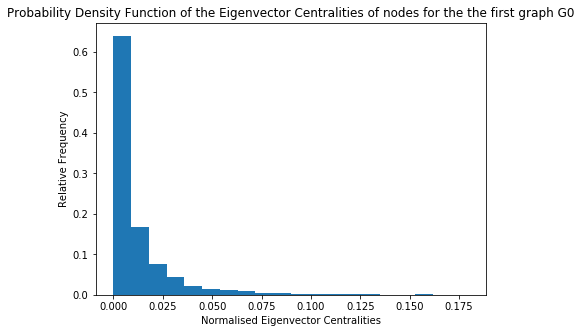

In [90]:
mydata=np.array(list(nx.eigenvector_centrality(graphs['G0']).values()))
fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(111)
n, bins, patches=ax.hist(mydata, bins=20, weights=np.zeros_like(mydata)+ 1./ mydata.size)
ax.set_xlabel('Normalised Eigenvector Centralities', size=10)
ax.set_ylabel('Relative Frequency', size=10)
ax.legend
ax.set_title('Probability Density Function of the Eigenvector Centralities of nodes for the the first graph G0')


KeyboardInterrupt

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc
    PyErr_CheckSignals()
KeyboardInterrupt


Text(0.5,1,'Probability Density Function of the Eigenvector Centralities of nodes for the the first graph G69')

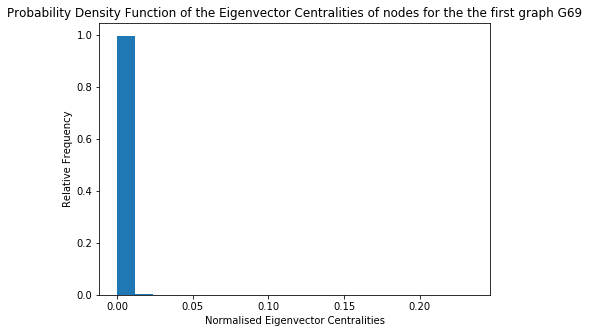

In [101]:
mydata=np.array(list(nx.eigenvector_centrality_numpy(graphs['G69']).values()))
fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(111)
n, bins, patches=ax.hist(mydata, bins=20, weights=np.zeros_like(mydata)+ 1./ mydata.size)
ax.set_xlabel('Normalised Eigenvector Centralities', size=10)
ax.set_ylabel('Relative Frequency', size=10)
ax.legend
ax.set_title('Probability Density Function of the Eigenvector Centralities of nodes for the the first graph G69')


#### e) Katz centrality 

Text(0.5,1,'Probability Density Function of the Katz Centralities of nodes for the the first graph G0')

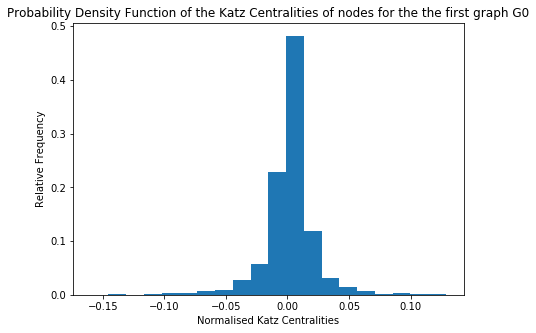

In [93]:
mydata=np.array(list(nx.katz_centrality_numpy(graphs['G0']).values()))
fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(111)
n, bins, patches=ax.hist(mydata, bins=20, weights=np.zeros_like(mydata)+ 1./ mydata.size)
ax.set_xlabel('Normalised Katz Centralities', size=10)
ax.set_ylabel('Relative Frequency', size=10)
ax.legend
ax.set_title('Probability Density Function of the Katz Centralities of nodes for the the first graph G0')

# PART II 

## Question 1

#### a)

In [6]:
#FOR NODES V*
b=list(graphs['G0'].nodes())
volumes_of_nodes=[]
for i in range(1,N-21):
    c=list(graphs['G' + str(i)].nodes())
    intersection=len(set(b).intersection(c))
    print(intersection)
    volumes_of_nodes.append(intersection)
    b=c

1735
6006
5970
5829
6323
7460
8308
8696
9687
11208
12105
12938
13242
14226
15912
16681
17083
18850
19900
19991
20496
21669
22631
23934
24341
24663
26528
27769
29396
34577
37879
38450
39884
40277
41156
43159
43243
43771
46948
46729
48822
55758
58557
60154
60119
59969
62622
63380
63416
67808
69484
66918
69450
76423
80068
82643
79077
78925
80306
80729
82188
85877
87789
85097
85908
96225
100292
95061
89374


#### b) and c)

In [7]:
#FOR EDGES E*[Tj-1, Tj] and E*[Tj, Tj+1]
def preva(i):
    nodes1=list(graphs['G' + str(i)].nodes())
    nodes2=list(graphs['G' + str(i+1)].nodes())
    vstar=set(nodes1).intersection(nodes2)
    edgesprevious=pd.DataFrame(list(graphs['G' + str(i)].edges()))
    edgesafter=pd.DataFrame(list(graphs['G' + str(i+1)].edges()))
    #vstardf=pd.DataFrame(list(vstar))
    rownum=0
    rownum=edgesprevious[0].count()-1
    l=[]
    for i in range(0,rownum):
        if (edgesprevious.iloc[i,0] in vstar) & (edgesprevious.iloc[i,1] in vstar):
            l.append(i)
    rownum=0
    rownum=edgesafter[0].count()-1
    m=[]
    for i in range(0,rownum):
        if (edgesafter.iloc[i,0] in vstar) & (edgesafter.iloc[i,1] in vstar):
            m.append(i)
    edgespreviousstar=edgesprevious.iloc[l,]
    edgesafterstar=edgesafter.iloc[m,]
    lista=[l,m]
    return lista

In [28]:
#for the 70 out of 91 periods call the preva function
volumes_of_edges_before_star=[]
volumes_of_edges_after_star=[]
for h in range(0,N-22): 
    p=preva(h)  
    volumes_of_edges_before_star.append(len(p[0]))
    volumes_of_edges_after_star.append(len(p[1]))
    

In [30]:
#Print of volumes of E*[Tj-1, Tj]
volumes_of_edges_before_star

[12239,
 50394,
 48654,
 36269,
 37761,
 52941,
 60217,
 58948,
 62002,
 72265,
 81603,
 84355,
 82008,
 87142,
 94698,
 101776,
 97633,
 115280,
 117438,
 113250,
 109530,
 115057,
 121511,
 128065,
 132072,
 129146,
 134776,
 147785,
 142246,
 175421,
 190871,
 195339,
 197347,
 199733,
 197334,
 203380,
 201889,
 193891,
 207413,
 214462,
 204677,
 243876,
 254559,
 256168,
 252067,
 242230,
 256657,
 259623,
 248425,
 259658,
 267558,
 249986,
 250756,
 292615,
 299127,
 312574,
 288554,
 278831,
 292108,
 291795,
 290413,
 299033,
 300329,
 292110,
 279361,
 324715,
 351116,
 325894,
 281856]

In [29]:
#Print of volumes of E*[Tj, Tj+1]
volumes_of_edges_after_star

[7874,
 38855,
 29647,
 28938,
 37858,
 45509,
 48506,
 47470,
 52990,
 63815,
 67903,
 67546,
 73102,
 75058,
 82249,
 81866,
 94455,
 101007,
 100524,
 94713,
 98223,
 104216,
 106233,
 115431,
 113803,
 112973,
 125091,
 121453,
 134824,
 154770,
 168300,
 169246,
 175471,
 169675,
 173722,
 179945,
 172736,
 175342,
 191326,
 179164,
 199272,
 216512,
 224699,
 227258,
 219605,
 223891,
 229891,
 228136,
 220393,
 235323,
 231910,
 222066,
 245462,
 258504,
 276425,
 273503,
 255205,
 257781,
 260202,
 260947,
 259230,
 266091,
 272765,
 253679,
 269335,
 303031,
 310424,
 276304,
 254454]

#### Graphical Representation of nodes

Text(0.5,1,'Time Evolution of |V*[tj-1,tj+1]|,|E*[tj-1,tj]| and |E*[tj,tj+1]|')

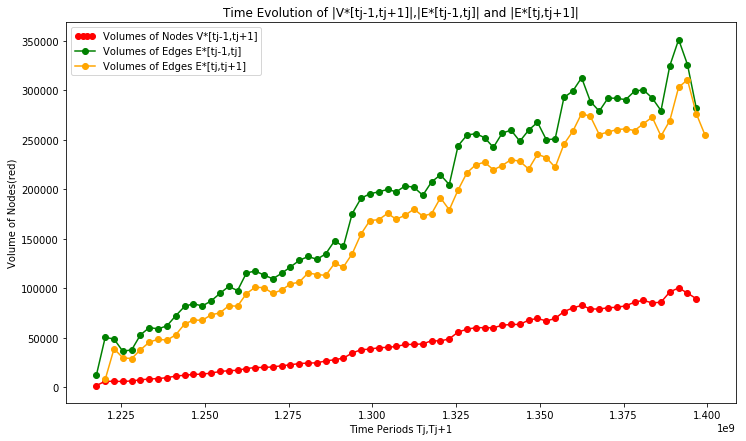

In [11]:
fig=plt.figure(figsize=(12,7))
#Part II 1a
line1,=plt.plot(timeperiods[0:69],volumes_of_nodes[0:69],color='red',marker='o',label='Volumes of Nodes V*[tj-1,tj+1]')

#Part II 1b
line2,=plt.plot(timeperiods[0:69],volumes_of_edges_before_star,color='green',marker='o',label='Volumes of Edges E*[tj-1,tj]')

#Part II 1c
line3,=plt.plot(timeperiods[1:70],volumes_of_edges_after_star,color='orange',marker='o',label='Volumes of Edges E*[tj,tj+1]')


plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

plt.xlabel('Time Periods Tj,Tj+1')
plt.ylabel('Volume of Nodes(red)')
plt.title('Time Evolution of |V*[tj-1,tj+1]|,|E*[tj-1,tj]| and |E*[tj,tj+1]|')

## Question 2

In [48]:
#Returns the edges of the E* of the t-1 to t period.
def edgesprevstar(i):
    nodes1=list(graphs['G' + str(i)].nodes())
    nodes2=list(graphs['G' + str(i+1)].nodes())
    vstar=set(nodes1).intersection(nodes2)
    edgesprevious=pd.DataFrame(list(graphs['G' + str(i)].edges()))
    edgesafter=pd.DataFrame(list(graphs['G' + str(i+1)].edges()))
    rownum=0
    rownum=edgesprevious[0].count()-1
    l=[]
    for i in range(0,rownum):
        if (edgesprevious.iloc[i,0] in vstar) & (edgesprevious.iloc[i,1] in vstar):
            l.append(i)
    edgespreviousstar=edgesprevious.iloc[l,]
    return edgespreviousstar

In [49]:
#finds the nodes of the intersection of two successive graphs
def preva2(i):
    nodes1=list(graphs['G' + str(i)].nodes())
    nodes2=list(graphs['G' + str(i+1)].nodes())
    vstar=set(nodes1).intersection(nodes2)
    return vstar

In [56]:
#calls the function preva2 to find the nodes of the intersection for G0 and G1
inters_nodes=preva2(0)
len(inters_nodes)

1735

In [51]:
#calls the function edgesprevstar to calculate
#the edges star of G0 in the intersection
result=edgesprevstar(0)
#convert the result to a networkX graph
graphofedgesprevstar=nx.from_pandas_edgelist(result,0,1)

In [57]:
d = pd.DataFrame(0, index=inters_nodes, columns=inters_nodes)

#### (b) Common neighbors

In [86]:
#In order to get the pairs (u,v) of the V* we use the following for loops
for i in common:
    for j in common:
        try:
            common_neighbors=nx.common_neighbors(graphofedgesprevstar,i,j)
            list_of_common=sorted(common_neighbors)
            d.loc[i,j]=len(list_of_common)
        except:
            #handle exception of not finding a pair of nodes or either of them and put NA
            #print the exception to check that this step is executed
            print(sys.exc_info()[0])
            d.loc[i,j]= np.nan


<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'networkx.exception.NetworkXError'>
<class 'net

In [88]:
#The dataframe with the matrix of the common neighbors similarity values.
d

,1,2,3,4,5,8,9,13,17,20,...,2587612,48281,1440933,146637,1228206,1121861,1130097,1842864,335696,2277364
1,79.0,1.0,2.0,1.0,13.0,0.0,1.0,6.0,10.0,4.0,...,0.0,1.0,0.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0
2,1.0,10.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.0,0.0,5.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,13.0,1.0,2.0,0.0,81.0,1.0,6.0,6.0,17.0,4.0,...,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0,1.0
8,0.0,1.0,0.0,0.0,1.0,5.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,1.0,0.0,0.0,6.0,1.0,23.0,1.0,3.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
13,6.0,2.0,0.0,1.0,6.0,1.0,1.0,32.0,5.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
17,10.0,2.0,1.0,0.0,17.0,0.0,3.0,5.0,73.0,4.0,...,0.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0
20,4.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,4.0,23.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### c) Jaccard's Coefficient

In [133]:
#Similarly we use Jaccard coefficient function to find the respective values. We do this for the second pair of values.
preds=nx.jaccard_coefficient(graphofedgesprevstar,[(1,2)])

In [134]:
for u, v, p in preds:
    print('(%d, %d) -> %.8f' % (u, v, p))

(1, 2) -> 0.01136364


#### d) Adamic

In [131]:
#Similarly we use Adamic function to find the respective values. We do this for the second pair of values.
adam=nx.adamic_adar_index(graphofedgesprevstar,[(1,2)])

In [132]:
for u, v, p in adam:
    print('(%d, %d) -> %.8f' % (u, v, p))

(1, 2) -> 0.22630370


#### e) Preferential Attachment

In [128]:
#Similarly we use Preferential Attahcment function to find the respective values. We do this for the second pair of values.
pref=nx.preferential_attachment(graphofedgesprevstar,[(1,2)])

In [129]:
for u, v, p in pref:
    print('(%d, %d) -> %.8f' % (u, v, p))

(1, 2) -> 810.00000000


#### a) Graph Distance

In [126]:
shortest=nx.shortest_path_length(graphofedgesprevstar, source=1, target=2, weight=None)

In [127]:
shortest

1